# Simulating Microlensing graphs

$I_{obs} \left( t \right) = I_{s0} + I_{A} + N \left( \sigma^{2} \right) $

$I_{s0}$ is baseline, $I_{A}$ is lens magnification


In [0]:
import numpy as np
from matplotlib import pyplot as plt

## Baseline

$I_{s0} = m_{A} \mbox{sin} \left( \frac{2 \pi t}{T} + \phi \right) $

where

$m_{A}$ is amplitude

$T$ is period

$\phi$ is phase


In [0]:
def intensity_baseline(period, amplitude, phase, t):
  return amplitude * np.sin((2 * np.pi * t / period) + phase)

In [0]:
is0_ex1 = [intensity_baseline(5, 0.00005, 0, x) for x in range(100)]

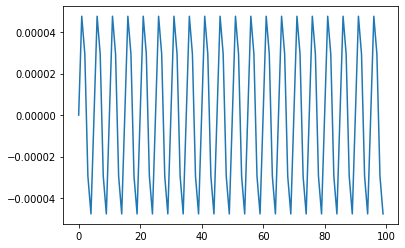

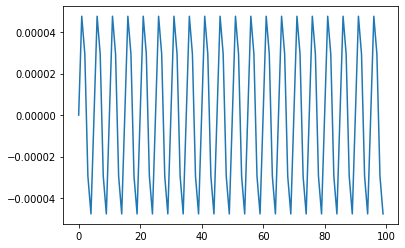

In [42]:
plt.plot(is0_ex1)

## Lens Magnification

$A \left( t \right) = \frac{\left[ u(t) \right]^{2} + 2}{u(t) + \sqrt{[u(t)]^2 + 4}} $

$u(t) = u_0 + \left| \frac{t-t_0}{T_E} \right|$

where

$u_0$ is minimum impact parameter

$T_E$ and $t_0$ determins the radius and shift in time

In [0]:
def lens_magnification(u0, t0, tE, t):
  ut = u0 + np.abs((t - t0) / tE)
  return (ut ** 2 + 2) / (ut * np.sqrt(ut**2 + 4))

In [0]:
iA_ex1 = [lens_magnification(10, 50, 2, x) for x in range(100)]

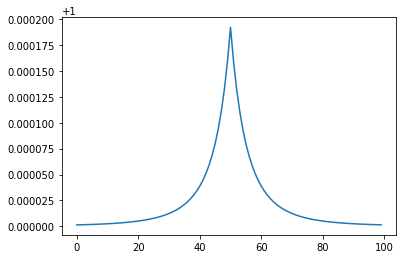

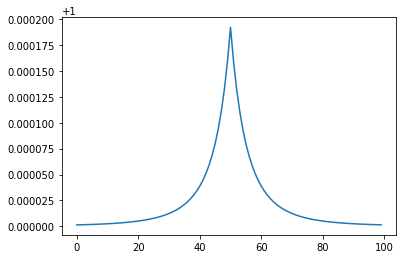

In [45]:
plt.plot(iA_ex1)

## Putting all together

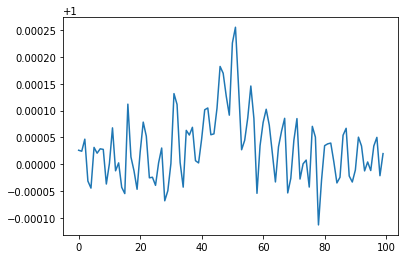

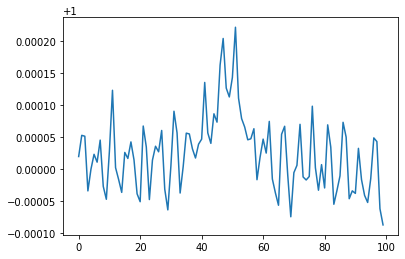

In [46]:
iobs_ex1 = np.array(iA_ex1) + np.array(is0_ex1) + np.random.normal(scale=0.00003, size=100)
plt.plot(iobs_ex1)

Perhaps its a good idea to normalize the graph so that it will have mean=0 and stdev=1

In [0]:
iobs_ex1_normalized = iobs_ex1 / np.linalg.norm(iobs_ex1)

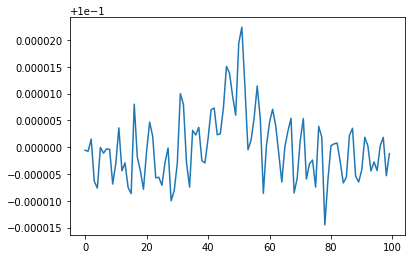

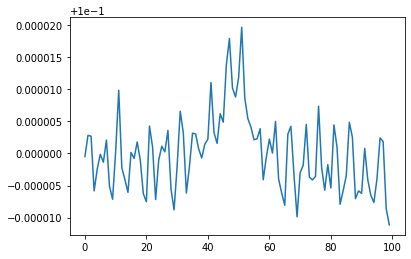

In [48]:
plt.plot(iobs_ex1_normalized)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def intensity_baseline(period, amplitude, phase, t):
  return amplitude * np.sin((2 * np.pi * t / period) + phase)


def lens_magnification(u0, t0, tE, t):
  ut = u0 + np.abs((t - t0) / tE)
  return (ut ** 2 + 2) / (ut * np.sqrt(ut**2 + 4))


def simulate_microlensing(baseline_period, baseline_amplitude, baseline_phase,
                          lens_min_impact, lens_shift, lens_radius, noise, t_range=range(100)):
  i_s0 = np.array([intensity_baseline(baseline_period, baseline_amplitude, baseline_phase, t) for t in t_range])
  i_A = np.array([lens_magnification(lens_min_impact, lens_shift, lens_radius, t) for t in t_range])
  n = np.random.normal(scale=noise, size=len(t_range))
  return i_s0 + i_A + n

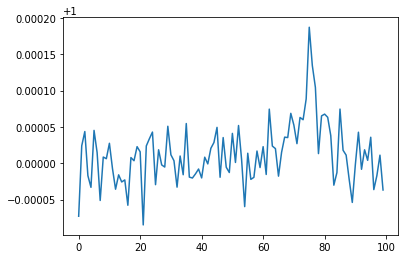

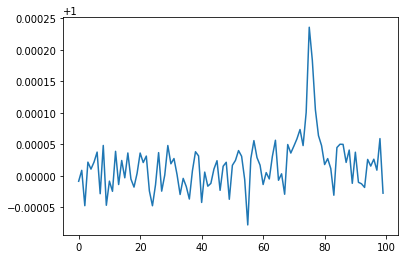

In [50]:
plt.plot(simulate_microlensing(baseline_period=2, baseline_amplitude=0.00001, baseline_phase=0,
                               lens_min_impact=10, lens_shift=75, lens_radius=1, noise=0.00003, t_range=range(100)))

# Fitting sampled data into ARIMA

Installing pyflux (library for time series analysis). Will be using ARIMA class for fitting the sampled data into ARIMA model and make prediction.

In [51]:
pip install pyflux 

     |████████████████████████████████| 1.3MB 42.0MB/s 
     |████████████████████████████████| 962kB 50.5MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656461 sha256=3db636ede670c2b416370b1600a4297f2a504a9450878a8d17872a541720e545
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux


In [0]:
import pyflux as pf

Creating the model

In [53]:
data = simulate_microlensing(baseline_period=2, baseline_amplitude=0.00001, baseline_phase=0,
                               lens_min_impact=10, lens_shift=75, lens_radius=1, noise=0.00003, t_range=range(1000))

model = pf.ARIMA(data=data, ar=10, integ=1, ma=10, target='microlense', family=pf.Normal())

NameError: ignored

Fitting the data and getting the summary

In [54]:
fit = model.fit("MLE")
fit.summary()

Normal ARIMA(10,1,10)                                                                                     
======================================================= ==================================================
Dependent Variable: Differenced Series                  Method: MLE                                       
Start Date: 10                                          Log Likelihood: 8881.8705                         
End Date: 999                                           AIC: -17719.7409                                  
Number of observations: 989                             BIC: -17612.0136                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 -0.0       0.0        -0.813   0.4162   (-0.0 | 0.0)             
AR(1)                                

Plotting the fit-

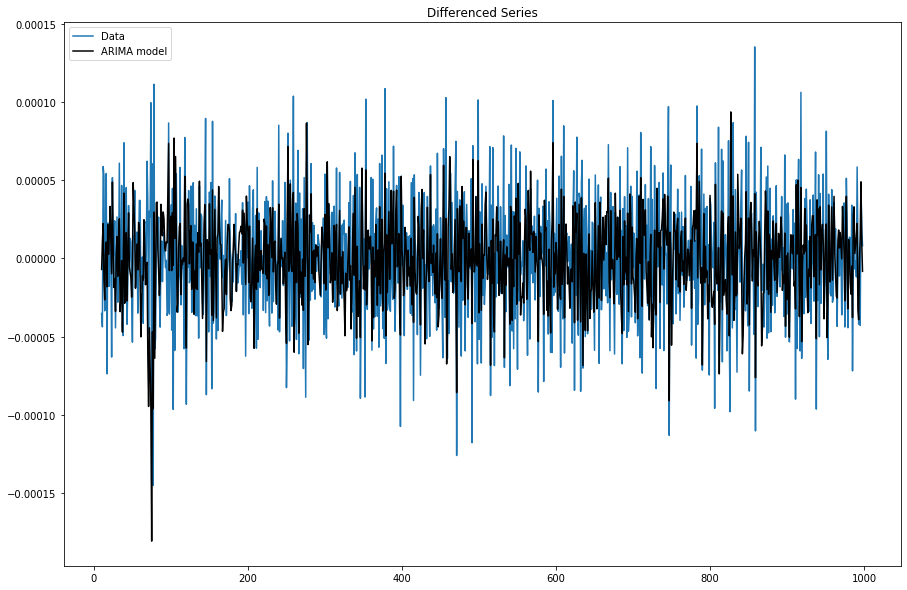

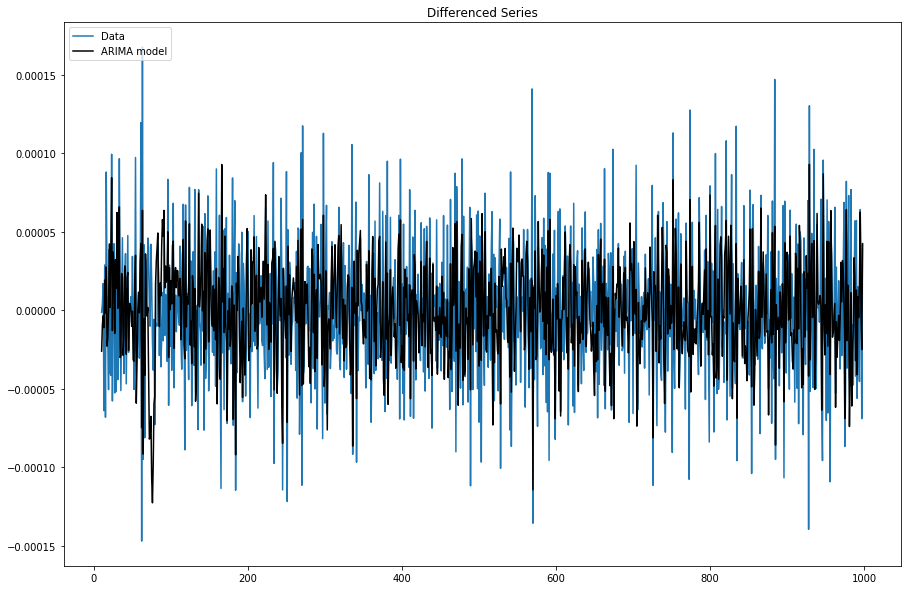

In [55]:
model.plot_fit(figsize=(15,10))

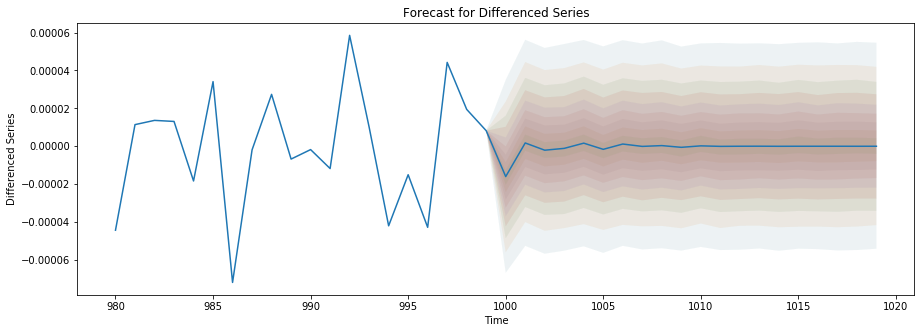

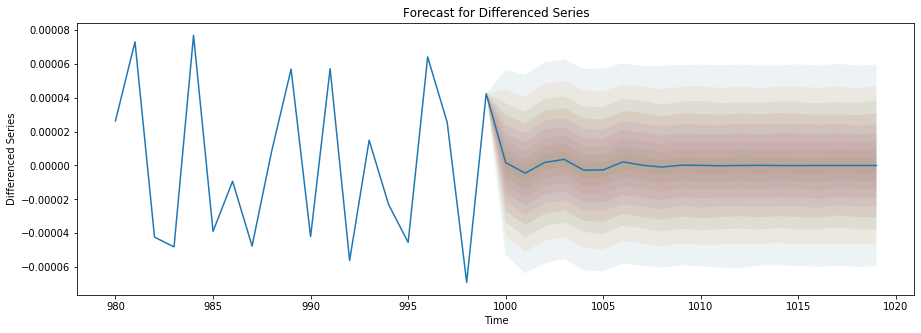

In [56]:
model.plot_predict(h=20,past_values=20,figsize=(15,5))

In [57]:
np.array(model.predict(h=70)['Differenced Series'])

array([-1.60454002e-05,  1.71425369e-06, -2.11358870e-06, -1.14512195e-06,
        1.60533777e-06, -1.65232999e-06,  1.14386667e-06, -1.03699478e-07,
        3.15999052e-07, -5.93841092e-07,  1.79821602e-07, -8.52368977e-08,
       -1.74809942e-08, -1.50449131e-09, -4.72767000e-08, -2.29511189e-08,
       -2.51363516e-08, -2.45686080e-08, -3.36115654e-08, -2.25867082e-08,
       -2.91391393e-08, -2.69080855e-08, -2.67488291e-08, -2.75200899e-08,
       -2.72130230e-08, -2.70600784e-08, -2.72314687e-08, -2.72581278e-08,
       -2.71102032e-08, -2.72409608e-08, -2.71840603e-08, -2.71839617e-08,
       -2.72010149e-08, -2.71931666e-08, -2.71895830e-08, -2.71955396e-08,
       -2.71934036e-08, -2.71918304e-08, -2.71942835e-08, -2.71929101e-08,
       -2.71930262e-08, -2.71934155e-08, -2.71931648e-08, -2.71931350e-08,
       -2.71932770e-08, -2.71931893e-08, -2.71931866e-08, -2.71932301e-08,
       -2.71931975e-08, -2.71932039e-08, -2.71932119e-08, -2.71932046e-08,
       -2.71932056e-08, -

array([ 1.66127222e-06, -4.55599313e-06,  1.80094150e-06,  3.59960877e-06,
       -2.77532318e-06, -2.61917395e-06,  2.11063410e-06,  1.50700377e-07,
       -9.31805016e-07,  1.80861381e-07,  5.71504182e-08, -1.67309978e-07,
        5.82377367e-10,  6.54392413e-08, -2.83028016e-08, -4.55177740e-08,
       -1.49643472e-08, -1.24455746e-08, -2.08036509e-08, -1.76682442e-08,
       -1.65048633e-08, -2.03343801e-08, -2.00103896e-08, -1.82874539e-08,
       -1.83620841e-08, -1.88238549e-08, -1.87701409e-08, -1.87671061e-08,
       -1.88328240e-08, -1.87716731e-08, -1.87169081e-08, -1.87419991e-08,
       -1.87693735e-08, -1.87656384e-08, -1.87605554e-08, -1.87596132e-08,
       -1.87575190e-08, -1.87574122e-08, -1.87594914e-08, -1.87602274e-08,
       -1.87595105e-08, -1.87590654e-08, -1.87590754e-08, -1.87591556e-08,
       -1.87592441e-08, -1.87593053e-08, -1.87592773e-08, -1.87592253e-08,
       -1.87592164e-08, -1.87592322e-08, -1.87592423e-08, -1.87592438e-08,
       -1.87592414e-08, -

In [58]:
model = pf.ARIMA(data=data, ar=4, integ=1, ma=4, target='microlense', family=pf.Normal())
model.fit("MLE")

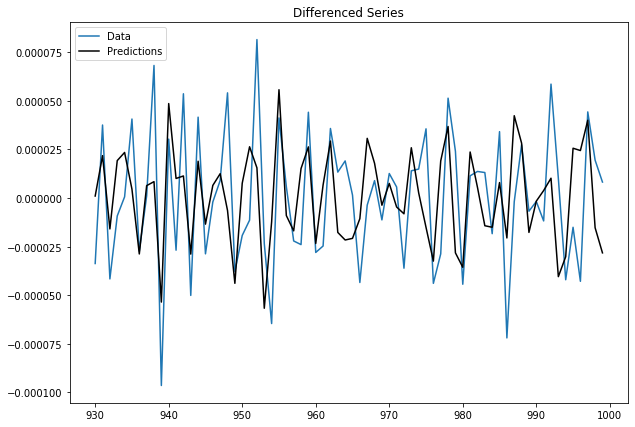

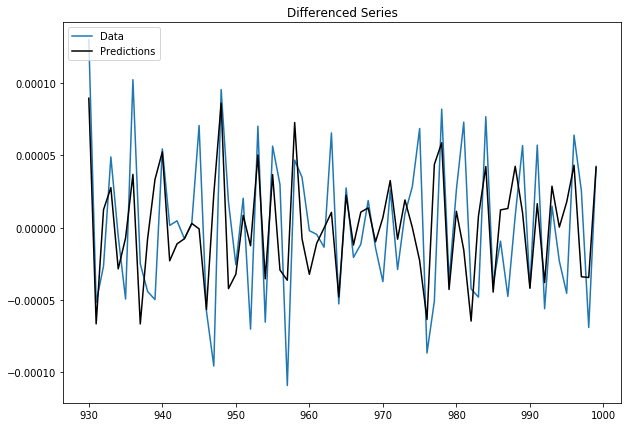

In [59]:
model.plot_predict_is(h=70)

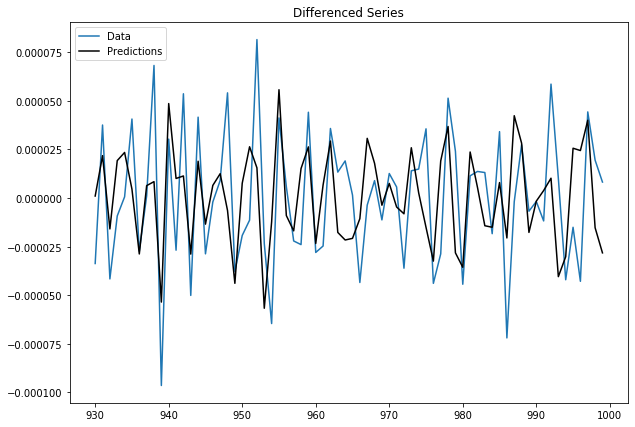

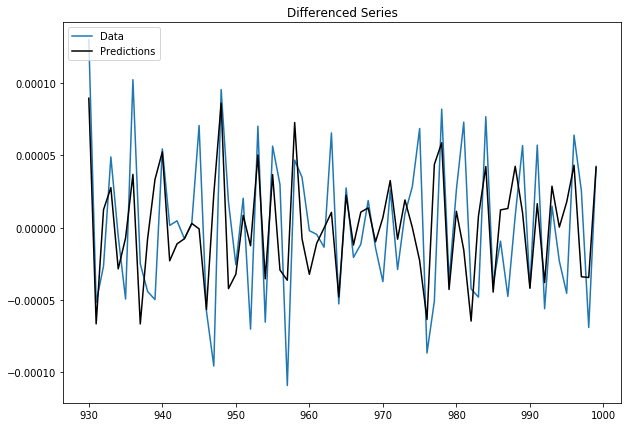

In [60]:
model.plot_predict_is(h=70)

# Generate Train and Test Data

In [0]:
def simulate_noevent(baseline_period, baseline_amplitude, baseline_phase, noise, t_range=range(100)):
    i_s0 = np.array([intensity_baseline(baseline_period, baseline_amplitude, baseline_phase, t) for t in t_range])
    n = np.random.normal(scale=noise, size=len(t_range))
    return i_s0 + n

In [0]:
from tqdm import tqdm

def generate_dataset(num_dataset):
    X_out = np.zeros((num_dataset, 100, 2))
    y_out = np.zeros((num_dataset, 100))

    for x in tqdm(range(num_dataset)):
        seq=None
        ys=None
        if np.random.uniform() > 0.5:
            peak_t = int(np.random.uniform(low=50, high=80))
            seq = simulate_microlensing(baseline_period=2, 
                                        baseline_amplitude=0.00001, 
                                        baseline_phase=0,
                                        lens_min_impact=10, 
                                        lens_shift=peak_t, 
                                        lens_radius=1, 
                                        noise=0.00003, 
                                        t_range=range(100))
            seq_avg = np.mean(seq[:30])
            seq_std = np.std(seq[:30])
            seq = (seq - seq_avg) / seq_std
            ys = np.zeros(100)
            ys[peak_t-10:peak_t] = 1
        else:
            seq = simulate_noevent(baseline_period=2, 
                                baseline_amplitude=0.00001,
                                baseline_phase=0,
                                noise=0.00003,
                                t_range=range(100))
            seq_avg = np.mean(seq[:30])
            seq_std = np.std(seq[:30])
            seq = (seq - seq_avg) / seq_std
            ys = np.zeros(100)
        model=pf.ARIMA(data=seq,ar=4, integ=1, ma=4, family=pf.Normal())
        model.fit('MLE')
        hs = model.predict_is(h=70)
        seq_sim = np.concatenate((seq[:30], hs['Differenced Series']))
        X_out[x,:,0] = seq
        X_out[x,:,1] = seq_sim
        y_out[x] = ys
    
    return X_out, y_out

In [63]:
np.random.seed(420)
X_train, y_train = generate_dataset(10)

100%|██████████| 10/10 [00:17<00:00,  1.89s/it]


In [64]:
np.random.seed(520)
X_test, y_test = generate_dataset(10)

100%|██████████| 10/10 [00:16<00:00,  1.70s/it]


# Injecting the residuals into LSTM 

Building the LSTM model

In [65]:
%tensorflow_version 2.x
from tensorflow.keras import backend as K


def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow.keras import layers

In [0]:
# Initialising the RNN
rnn_lstm = tf.keras.Sequential()

In [0]:
# Adding the LSTM layers and some Dropout regularisation

# Adding the first layer
rnn_lstm.add(layers.LSTM(units=300, return_sequences=True, input_shape=(None, 2)))
rnn_lstm.add(layers.Dropout(0.1))

# Output layer
rnn_lstm.add(layers.Dense(units=1, activation='sigmoid'))

In [69]:
# Compiling the RNN
rnn_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc', f1_m])
rnn_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 300)         363600    
_________________________________________________________________
dropout (Dropout)            (None, None, 300)         0         
_________________________________________________________________
dense (Dense)                (None, None, 1)           301       
Total params: 363,901
Trainable params: 363,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 300)         363600    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 300)         0         
____________________________

In [70]:
# Fitting the RNN to training set
rnn_lstm.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Train on 10 samples, validate on 10 samples
Epoch 1/10
10/10 [==============================] - 5s 517ms/sample - loss: 0.2996 - acc: 0.5060 - f1_m: 0.1018 - val_loss: 0.2401 - val_acc: 0.6070 - val_f1_m: 0.1512
Epoch 2/10
10/10 [==============================] - 0s 3ms/sample - loss: 0.2483 - acc: 0.6000 - f1_m: 0.1111 - val_loss: 0.2141 - val_acc: 0.6960 - val_f1_m: 0.1872
Epoch 3/10
10/10 [==============================] - 0s 3ms/sample - loss: 0.2244 - acc: 0.6880 - f1_m: 0.1236 - val_loss: 0.1819 - val_acc: 0.8980 - val_f1_m: 0.0893
Epoch 4/10
10/10 [==============================] - 0s 3ms/sample - loss: 0.1890 - acc: 0.8410 - f1_m: 0.1017 - val_loss: 0.1562 - val_acc: 0.9170 - val_f1_m: 0.1075
Epoch 5/10
10/10 [==============================] - 0s 3ms/sample - loss: 0.1617 - acc: 0.9150 - f1_m: 0.1237 - val_loss: 0.1362 - val_acc: 0.9390 - val_f1_m: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 0s 3ms/sample - loss: 0.1410 - acc: 0.9310 - f1_m: 0.1039 - val_loss

Train on 10 samples, validate on 10 samples
Epoch 1/10
10/10 [==============================] - 2s 215ms/sample - loss: 0.2966 - acc: 0.3790 - f1_m: 0.1339 - val_loss: 0.2411 - val_acc: 0.4880 - val_f1_m: 0.1049
Epoch 2/10
10/10 [==============================] - 0s 3ms/sample - loss: 0.2383 - acc: 0.6090 - f1_m: 0.1292 - val_loss: 0.1929 - val_acc: 0.8590 - val_f1_m: 0.0662
Epoch 3/10
10/10 [==============================] - 0s 3ms/sample - loss: 0.1927 - acc: 0.8440 - f1_m: 0.0824 - val_loss: 0.1729 - val_acc: 0.9030 - val_f1_m: 0.0935
Epoch 4/10
10/10 [==============================] - 0s 3ms/sample - loss: 0.1738 - acc: 0.9000 - f1_m: 0.1071 - val_loss: 0.1570 - val_acc: 0.8960 - val_f1_m: 0.1613
Epoch 5/10
10/10 [==============================] - 0s 3ms/sample - loss: 0.1604 - acc: 0.9040 - f1_m: 0.1111 - val_loss: 0.1452 - val_acc: 0.9070 - val_f1_m: 0.1770
Epoch 6/10
10/10 [==============================] - 0s 3ms/sample - loss: 0.1491 - acc: 0.9110 - f1_m: 0.1188 - val_loss: 0.

In [71]:
rnn_lstm.evaluate(X_test, y_test)

10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 896us/sample - loss: 0.0716 - acc: 0.9400 - f1_m: 0.0000e+00


[0.07164783775806427, 0.93999994, 0.0]

10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 757us/sample - loss: 0.0791 - acc: 0.9100 - f1_m: 0.1818


[0.07910220324993134, 0.91, 0.18181813]

In [72]:
sum(sum(y_test)) / 1000

0.06

0.06

In [0]:
y_pred=rnn_lstm.predict_proba(X_test)

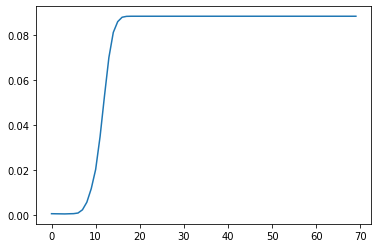

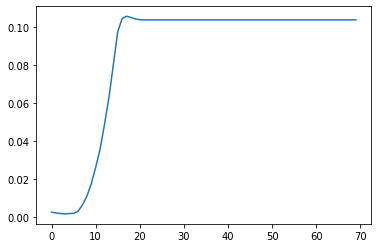

In [74]:
plt.plot(y_pred[4][30:])

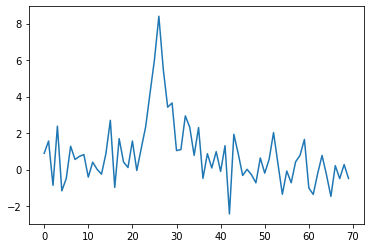

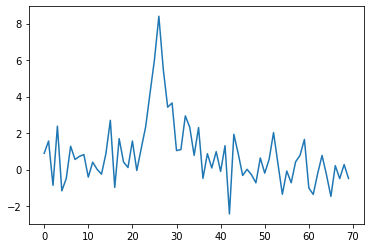

In [75]:
plt.plot(X_test[4,:,0][30:])